The critical volume of fissile material is 0.007 m^3
The critical mass of fissile material for a cubic volume is 131.1 kg


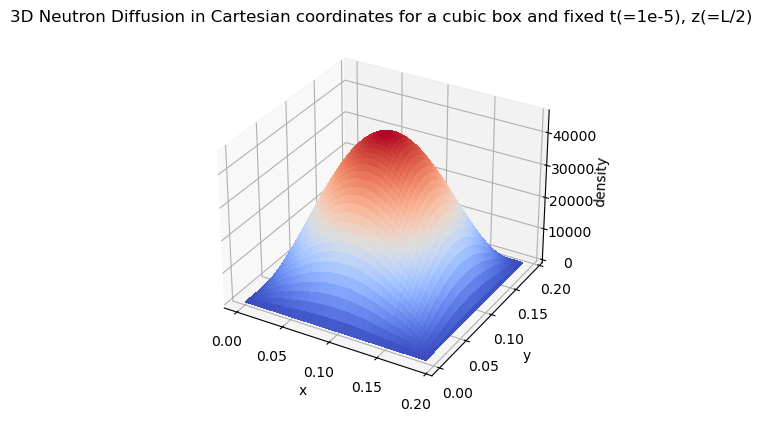

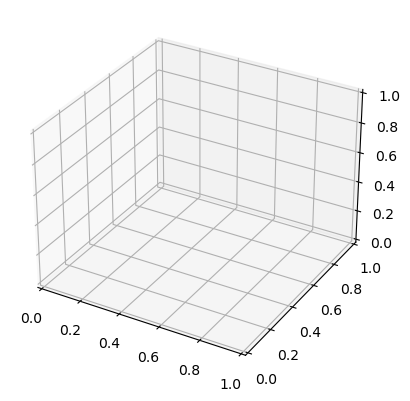

In [1]:
#3D case in Cartesian Coordinates w/ zero Dirichlet boundary conditions
# We are studying the neutron diffusion in 3-dimensions. This does not represent a physical situation due to the
# Dirchlet Boundary Condition. 
# We find the critical dimension (side of a cubic box) of the fissile material, the critical mass and
# the evolution of the neutron density as a function of time. A first plot of the density is 
# produced for a fixed time and a fixed height of the box and then a dynamical plot (.gif file) is produced 
# and saved to show the evolution in time of the neutron density at a fixed height of the box
# 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource, Normalize
import scipy.integrate as spi
import scipy.special as sc
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.animation import PillowWriter

# Reading parameters from an external file .txt
file1 = open('/Users/enrico.perboni14/Desktop/Tesi Magistrale/Uranium235.txt', "r")
read_content = file1.readlines()[0 : 4]
values = list(range(4))
for i in range(0,4):
    values[i] = read_content[i].split()
for i in range(0,4):
    exec("%s = %f" % (values[i][0],float(values[i][2])))
file1.close()

# Finding critical size and critical mass
L_critical_3d = np.pi*np.sqrt(3*mu/eta)
L_3d = round(L_critical_3d, 3) + 0.001
V_critical_3d = L_critical_3d**3
V_3d = L_3d**3
mass_3d = rho * V_critical_3d
print('The critical volume of fissile material is', round(V_critical_3d, 4), 'm^3')
print('The critical mass of fissile material for a cubic volume is', round(mass_3d, 2), 'kg')

# Setting the maximum value of the time, otherwise we'll encounter an overflow
T_3d = 1e-5

#The Fourier coefficients of the general solution
initial_condition_3D = lambda x, y, z: (8/(L_3d**3))*x*y*z*(1-x/L_3d)*(1-y/L_3d)*(1-z/L_3d)
integrand_Fourier_coefficients_3D = lambda x, y, z: (8/(L_3d**3))*initial_condition_3D(x,y,z)*np.sin(p*np.pi*x/L_3d)*np.sin(q*np.pi*y/L_3d)*np.sin(r*np.pi*z/L_3d)

tupla_coefficient_3D = np.zeros((4, 4, 4), dtype = tuple)

for j in range(0,4):    
    for i in range(0,4):        
        for k in range (0,4):            
            r = j + 1
            q = i + 1
            p = k + 1
            tupla_coefficient_3D[k][i][j] = spi.tplquad(integrand_Fourier_coefficients_3D, 0, L_3d, 0, L_3d, 0, L_3d)

#Transformation in a tensor of float numbers 
float_coefficients_3D = np.zeros((4, 4, 4), dtype = float)
for j in range (0,4):
    for i in range (0,4):
        for k in range(0,4):
            float_coefficients_3D[j][i][k] = tupla_coefficient_3D[k][i][j][0] 

# The three-dimensional neutron density
def neutron_density_3D(t,x,y,z):
    neutron_density_3D = 0
    for j in range(0,4):
        r = j+1
        for i in range(0,4):
            q = i+1
            for k in range (0,4):
                p = k+1             
                neutron_density_3D += float_coefficients_3D[j][i][k] * np.exp(eta*t - mu*(np.pi**2)*(p**2 + q**2 + r**2)*t/(L_3d**2))*np.sin(p*np.pi*x/L_3d)*np.sin(q*np.pi*y/L_3d)*np.sin(r*z*np.pi/L_3d)
    return neutron_density_3D

# Plotting the results
neutron_diffusion_3D_plot = plt.figure()
ax = plt.axes(projection = '3d')
x = np.linspace(0, L_3d, 100)
y = np.linspace(0, L_3d, 100)
z = L_3d/2
X, Y = np.meshgrid(x,y)
Z = neutron_density_3D(T_3d, X,Y, z)
surf = ax.plot_surface(X,Y , Z, cmap=cm.coolwarm,
               linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('density')
ax.set_title('3D Neutron Diffusion in Cartesian coordinates for a cubic box and fixed t(=1e-5), z(=L/2)')
plt.show()

# We are going now to create the dynamical plot for the 3D neutron diffusion

# Fixing random state for reproducibility
np.random.seed(19680801)

metadata = dict(title='Movie', artist='enricoperboni4')
writer = PillowWriter(fps=15, metadata=metadata)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

with writer.saving(fig, "3D Cartesian Neutron Diffusion.gif", 100):
    for tval in np.linspace(0,T_3d, 150):
        zval = neutron_density_3D(tval, X,Y,z)
        ax.set_zlim(0, 5e4)
        ax.plot_surface(X,Y,zval,cmap=cm.coolwarm)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('density')
        ax.set_title('3D Neutron Diffusion in Cartesian Coordinates, z=L/2')


        writer.grab_frame()
        plt.cla()
